In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv(r"data\heart_encoded.csv")
print(data)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.479167  1.0   0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1    0.500000  1.0   0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2    0.854167  1.0   0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3    0.666667  1.0   0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4    0.687500  0.0   0  0.415094  0.383562  1.0      0.5  0.267176    0.0   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
963  0.625000  1.0   1  0.433962  0.216895  0.0      0.5  0.709924    1.0   
964  0.645833  1.0   0  0.292453  0.301370  0.0      0.0  0.534351    1.0   
965  0.375000  1.0   0  0.150943  0.340183  0.0      0.0  0.358779    1.0   
966  0.437500  0.0   0  0.150943  0.292237  0.0      0.0  0.671756    0.0   
967  0.520833  1.0   0  0.245283  0.141553  0.0      0.5  0.320611    0.0   

      oldpeak  slope    ca  thal  target  
0    0.161290      2  0.50     3

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB
None


In [30]:
null_count = data.isnull().sum()
print(null_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
data.fillna(data.mean(), inplace=True)

In [10]:
null_count = data.isnull().sum()
print(null_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       968 non-null    float64
 1   sex       968 non-null    float64
 2   cp        968 non-null    int64  
 3   trestbps  968 non-null    float64
 4   chol      968 non-null    float64
 5   fbs       968 non-null    float64
 6   restecg   968 non-null    float64
 7   thalach   968 non-null    float64
 8   exang     968 non-null    float64
 9   oldpeak   968 non-null    float64
 10  slope     968 non-null    int64  
 11  ca        968 non-null    float64
 12  thal      968 non-null    int64  
 13  target    968 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 106.0 KB
None


In [12]:

print("First few rows of the data:")
print(data.head(15)[['oldpeak']])

First few rows of the data:
     oldpeak
0   0.161290
1   0.500000
2   0.419355
3   0.000000
4   0.306452
5   0.161290
6   0.709677
7   0.129032
8   0.129032
9   0.516129
10  0.258065
11  0.483871
12  0.112903
13  0.677419
14  0.161290


In [13]:
numerical_cols = ["age","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","ca","target"]

In [14]:
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [15]:
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

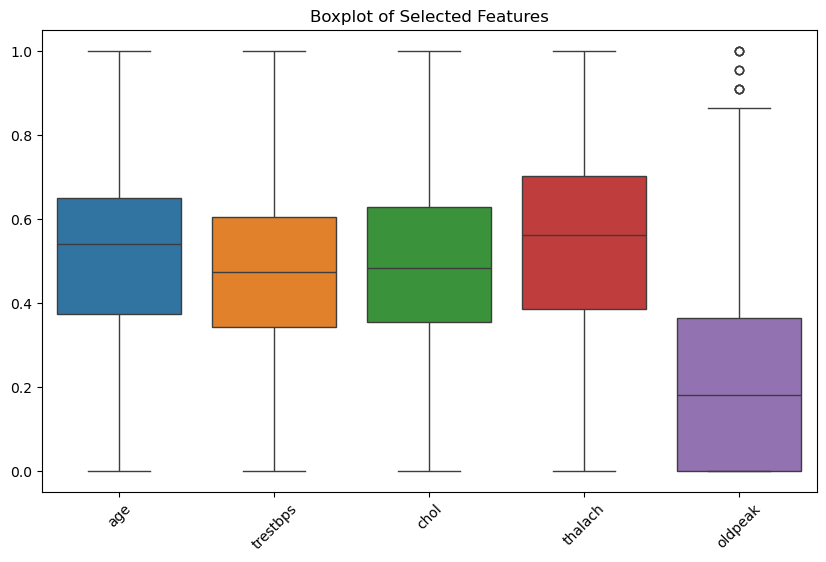

In [16]:
plt.figure(figsize=(10, 6))

# Determine the required features.
selected_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Drawing BoxPlot.
sns.boxplot(data=data[selected_features])
plt.xticks(rotation=45)   #Rotate column names to make them clear.
plt.title("Boxplot of Selected Features")
plt.show()

In [17]:
import numpy as np


In [18]:
def detect_outliers(df, features):
    outlier_indices = {}

    for feature in features:
        # Calculate the first quarter (Q1) and the third quarter (Q3).
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1  

        # Determine the lower and upper limits.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers.
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices[feature] = outliers.tolist()

        # Print the number of outliers for each feature.
        print(f"Feature '{feature}' has {len(outliers)} outliers.")

    return outlier_indices

# Identify numerical features
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Call the function to detect outliers
outliers_dict = detect_outliers(data, numerical_features)

Feature 'age' has 0 outliers.
Feature 'trestbps' has 0 outliers.
Feature 'chol' has 0 outliers.
Feature 'thalach' has 0 outliers.
Feature 'oldpeak' has 11 outliers.


In [19]:

def detect_important_outliers(df, features, threshold=0.05):
    """ 
    Detects significant outliers only based on how much they affect the data.
    threshold: The acceptable percentage change in the mean after removing outliers.
    """
    cleaned_df = df.copy()  # Create a copy of the original data.
    
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers.
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        if not outliers.empty:
           # Calculate the average before deleting
            mean_before = df[feature].mean()
            
            # Remove outliers
            cleaned_feature = df[feature][~df.index.isin(outliers.index)]
            mean_after = cleaned_feature.mean()
            
            # Impact comparison
            change = abs(mean_after - mean_before) / mean_before
            
            # Delete values ​​only if they affect the data by more than the specified threshold.
            if change > threshold:
                cleaned_df = cleaned_df.drop(index=outliers.index)
                print(f"Removed {len(outliers)} outliers from '{feature}' due to high impact.")
            else:
                print(f"Kept outliers in '{feature}' as they have low impact.")

    return cleaned_df

# Specify numerical features only
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Data cleaning while keeping outliers insignificant
cleaned_data = detect_important_outliers(data, numerical_features)



Kept outliers in 'oldpeak' as they have low impact.


In [20]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"] # Numerical features

# Calculate the limits for each numerical feature
for feature in numerical_features:
    upper_limit = data[feature].mean() + 3 * data[feature].std()
    lower_limit = data[feature].mean() - 3 * data[feature].std()

    print(f"🔹 {feature}: Upper limit = {upper_limit}, Lower limit = {lower_limit}")


🔹 age: Upper limit = 1.0928011415314245, Lower limit = -0.04807834538817368
🔹 trestbps: Upper limit = 1.0771408527697357, Lower limit = -0.13262693367447664
🔹 chol: Upper limit = 1.0779535845443644, Lower limit = -0.08266856653207377
🔹 thalach: Upper limit = 1.1360960954304664, Lower limit = -0.05772868931186381
🔹 oldpeak: Upper limit = 0.9588332683177467, Lower limit = -0.5038914548215478


In [21]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]  # Numerical features

# Find the extreme values ​​for each numerical feature.
outliers_dict = {}  # Dictionary to store extreme values ​​for each feature

for feature in numerical_features:
    upper_limit = data[feature].mean() + 3 * data[feature].std()
    lower_limit = data[feature].mean() - 3 * data[feature].std()

    # Extract extreme values ​​for this feature
    outliers = data.loc[(data[feature] > upper_limit) | (data[feature] < lower_limit)]
    
    # Save extreme values ​​in the dictionary
    outliers_dict[feature] = outliers

    print(f"🔹 {feature}: Found {len(outliers)} outliers.")

# Display extreme values ​​for each numerical feature
outliers_dict


🔹 age: Found 0 outliers.
🔹 trestbps: Found 0 outliers.
🔹 chol: Found 0 outliers.
🔹 thalach: Found 0 outliers.
🔹 oldpeak: Found 4 outliers.


{'age': Empty DataFrame
 Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
 Index: [],
 'trestbps': Empty DataFrame
 Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
 Index: [],
 'chol': Empty DataFrame
 Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
 Index: [],
 'thalach': Empty DataFrame
 Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
 Index: [],
 'oldpeak':           age  sex  cp  trestbps      chol  fbs  restecg  thalach  exang  \
 6    0.604167  1.0   0  0.263158  0.820513  0.0      1.0  0.45614    0.0   
 142  0.604167  1.0   0  0.263158  0.820513  0.0      1.0  0.45614    0.0   
 618  0.604167  1.0   0  0.263158  0.820513  0.0      1.0  0.45614    0.0   
 956  0.604167  1.0   0  0.263158  0.820513  0.0      1.0  0.45614    0.0   
 
      oldpeak  slope    ca  

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
# Create a copy of the data to remove only outliers from unimportant features.
cleaned_data = data.copy()

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Only keep values ​​that are not out of the normal range.
    cleaned_data = cleaned_data.loc[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]

# Print the number of rows before and after deletion
print("🔹before removing outliers:", len(data))
print("🔹after removing outliers:", len(cleaned_data))
print("🔹outliers:", len(data) - len(cleaned_data))
data=cleaned_data


🔹before removing outliers: 968
🔹after removing outliers: 957
🔹outliers: 11


In [24]:
# Apply One-Hot Encoding to categorical columns
categorical_cols = ['cp', 'thal', 'slope']  # Ensure these columns exist in the dataset
cleaned_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

# Display the first 5 rows after encoding
print("\nFirst 5 rows after encoding:\n",  cleaned_data.head())




First 5 rows after encoding:
         age  sex  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0  0.479167  1.0  0.407895  0.367521  0.0      0.5  0.701754    0.0  0.227273   
1  0.500000  1.0  0.605263  0.329060  1.0      0.0  0.587719    1.0  0.704545   
2  0.854167  1.0  0.671053  0.205128  0.0      0.5  0.324561    1.0  0.590909   
3  0.666667  1.0  0.710526  0.329060  0.0      0.5  0.640351    0.0  0.000000   
4  0.687500  0.0  0.578947  0.717949  1.0      0.5  0.157895    0.0  0.431818   

     ca  target   cp_1   cp_2   cp_3  thal_1  thal_2  thal_3  slope_1  slope_2  
0  0.50     0.0  False  False  False   False   False    True    False     True  
1  0.00     0.0  False  False  False   False   False    True    False    False  
2  0.00     0.0  False  False  False   False   False    True    False    False  
3  0.25     0.0  False  False  False   False   False    True    False     True  
4  0.75     0.0  False  False  False   False    True   False     True    Fals

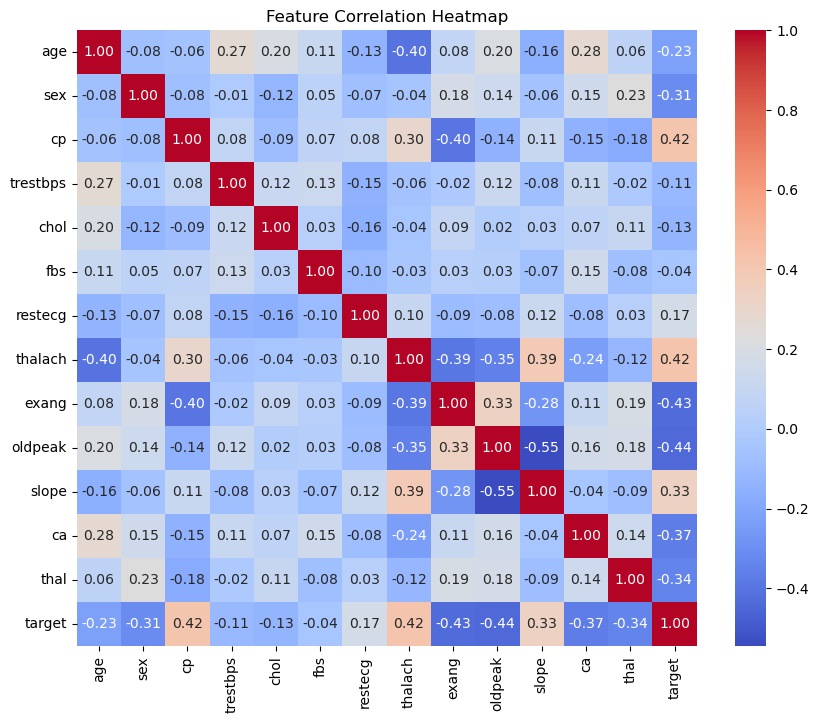


📌 Features ranked by correlation with target:
thalach     0.424189
cp          0.415593
slope       0.332543
restecg     0.172238
fbs        -0.043130
trestbps   -0.105488
chol       -0.129606
age        -0.225800
sex        -0.314742
thal       -0.342481
ca         -0.367153
exang      -0.432019
oldpeak    -0.439076
Name: target, dtype: float64


In [25]:
#calculate matrix
correlation_matrix = data.corr()

#drawing Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
threshold = 0.5  # Define threshold for strong correlation
correlation_with_target = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print("\n📌 Features ranked by correlation with target:")
print(correlation_with_target)


In [26]:
# Print the number of rows before and after deletion
print("🔹before removing outliers:", len(data))



🔹before removing outliers: 957


In [27]:
# Save the encoded dataset
data.to_csv(r"D:\c++\firstc++\heart (1).csv", index=False)
print("\nEncoded dataset saved successfully as heart_encoded.csv!")


OSError: Cannot save file into a non-existent directory: 'D:\c++\firstc++'

 Data Visualization

In [ ]:
data.describe()

age         sex    trestbps        chol         fbs     restecg  \
count  968.000000  968.000000  968.000000  968.000000  968.000000  968.000000   
mean     0.522361    0.715909    0.338599    0.265864    0.140496    0.265253   
std      0.190147    0.451213    0.144563    0.103343    0.347680    0.260682   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.375000    0.000000    0.245283    0.189498    0.000000    0.000000   
50%      0.541667    1.000000    0.339623    0.257991    0.000000    0.500000   
75%      0.651042    1.000000    0.433962    0.335616    0.000000    0.500000   
max      1.000000    1.000000    0.716981    0.534247    1.000000    1.000000   

          thalach       exang     oldpeak          ca      target  
count  968.000000  968.000000  968.000000  968.000000  968.000000  
mean     0.598984    0.327479    0.161431    0.186983    0.524793  
std      0.173150    0.469536    0.173010    0.256318    0.499643  
min      0.129771    0.000000    0.000000    0.000000    0.000000  
25%      0.465649    0.000000    0.000000    0.000000    0.000000  
50%      0.618321    0.000000    0.129032    0.000000    1.000000  
75%      0.740458    1.000000    0.258065    0.250000    1.000000  
max      1.000000    1.000000    0.709677    1.000000    1.000000

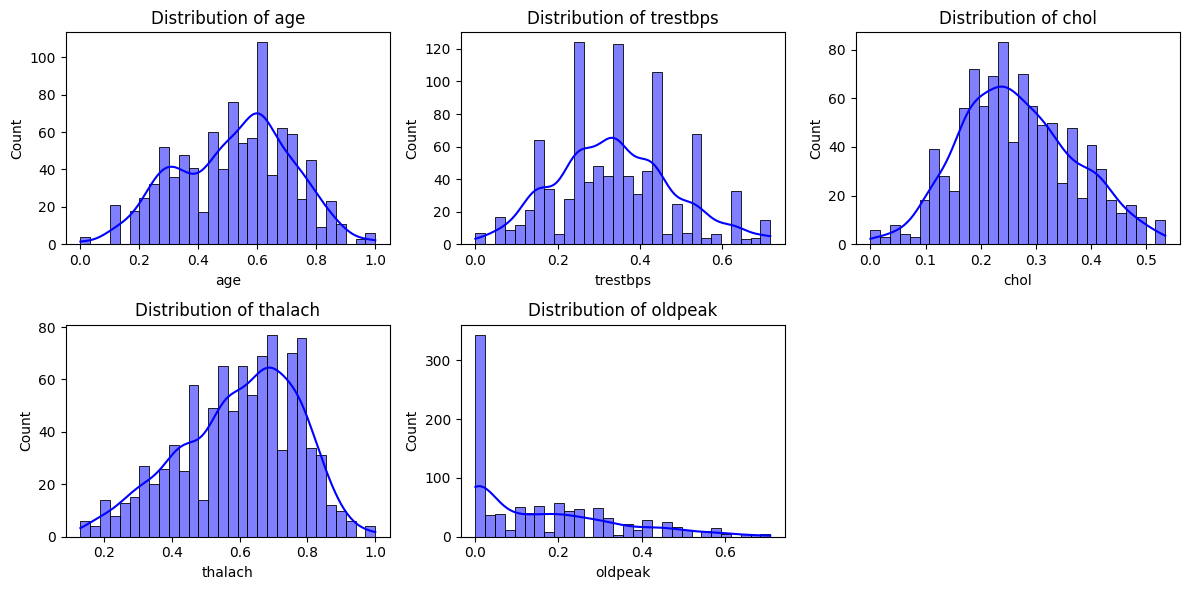

In [ ]:
import math

num_features = len(numerical_features) # Number of features
rows = math.ceil(num_features / 3)  #Automatically calculate the number of rows
cols = 3  #Three columns

plt.figure(figsize=(12, rows * 3))  # Automatically adjust shape size

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)  # Using dynamic values
    sns.histplot(data[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


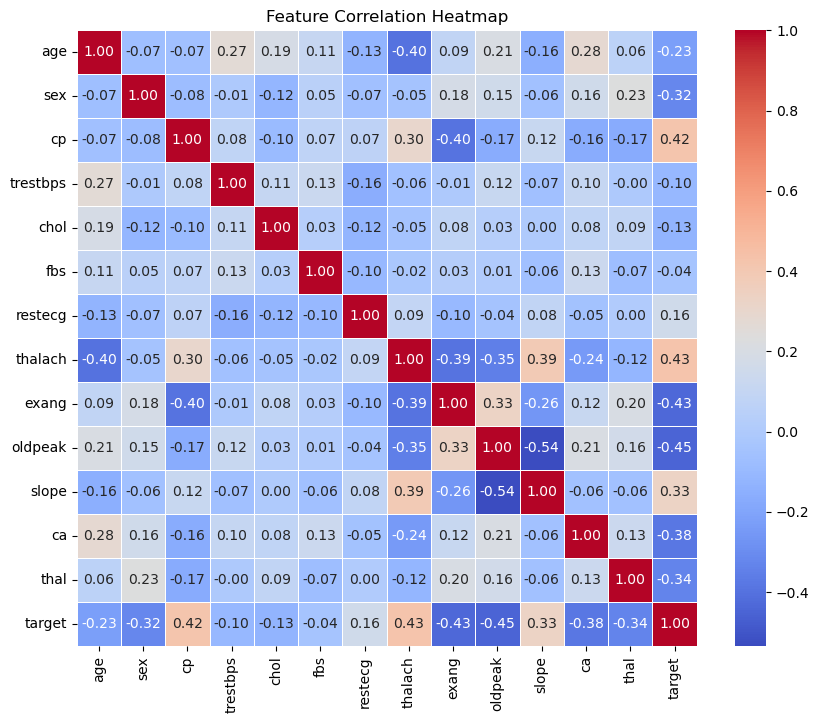

In [ ]:
# Correlation matrix calculation
correlation_matrix = data.corr()

# Draw a Heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

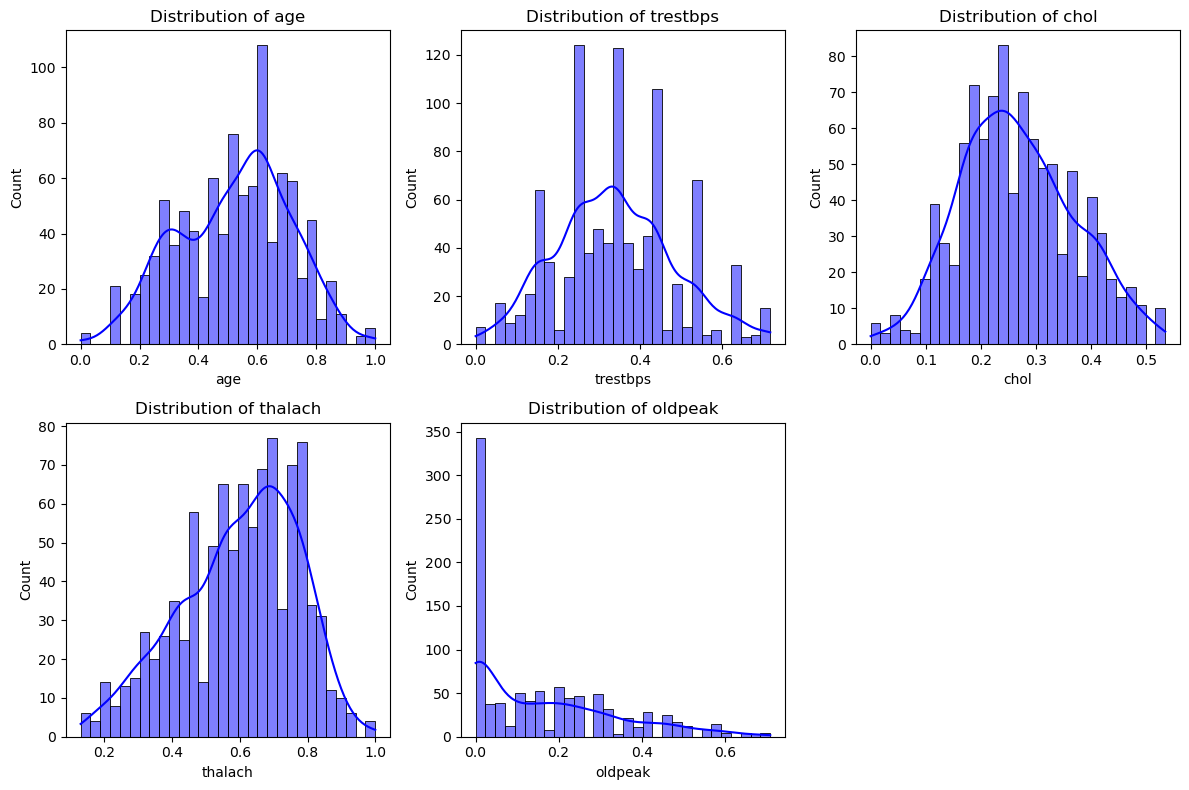

In [ ]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Distribution plot using Histogram
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  #Divide the drawing into 2 rows and 3 columns
    sns.histplot(data[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

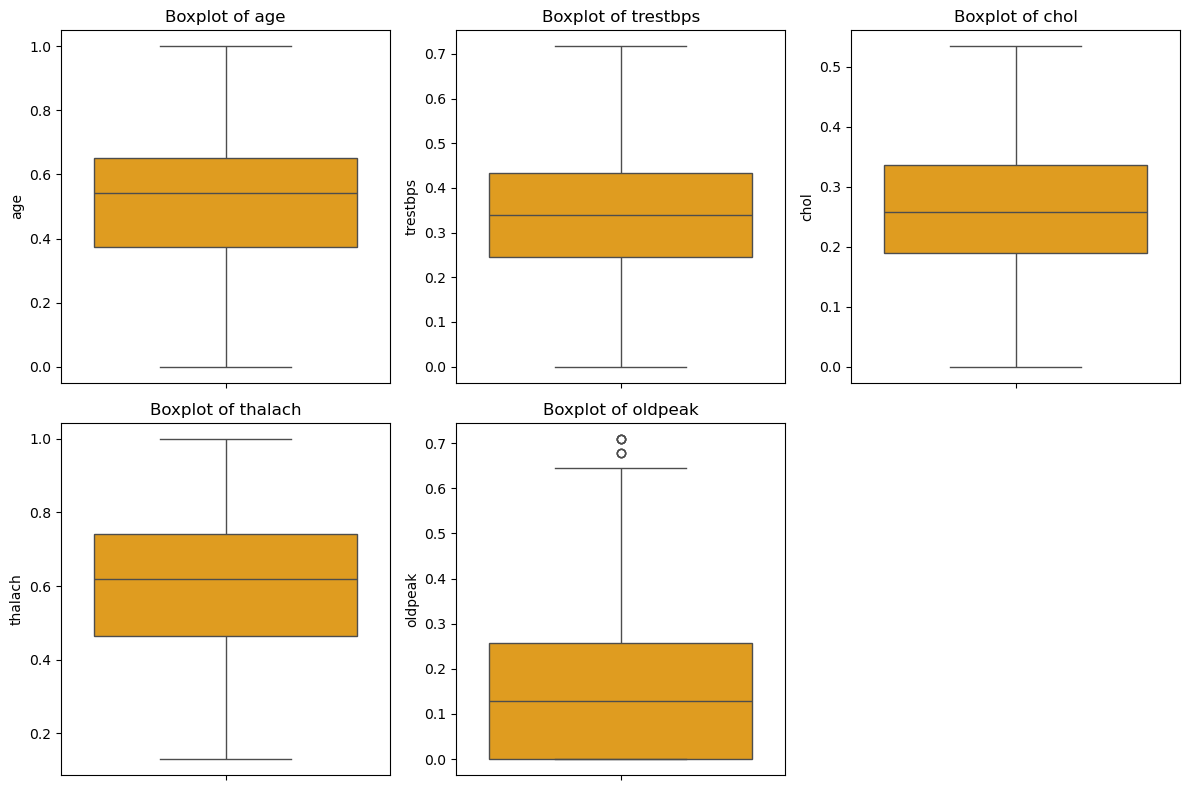

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature], color="orange")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


C:\Users\Hussein H-Tech\AppData\Local\Temp\ipykernel_996\3821639681.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


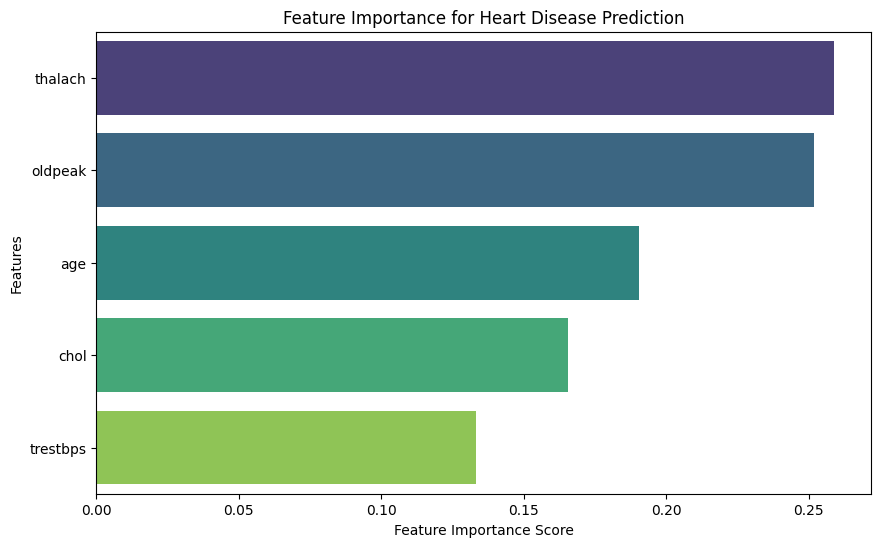

In [ ]:
# Separate the data into features (X) and targets (y)

X = data[numerical_features]  
y = data["target"]  #Target column (cardiac injury)

# Random Forest Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract the importance of features
feature_importance = pd.Series(model.feature_importances_, index=numerical_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()


Implement Rule-Based Expert System (Experta) 

In [ ]:
import collections
import collections.abc
collections.Mapping = collections.abc.Mapping
from experta import *

# Define an Expert System Class
class HealthRiskExpert(KnowledgeEngine):
    
    @Rule(Fact(cholesterol=P(lambda x: x > 240)) & Fact(age=P(lambda x: x > 50)))
    def high_cholesterol_risk(self):
        print("⚠ High Risk: High cholesterol and age over 50!")

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)) & Fact(smoking="yes"))
    def high_bp_smoking_risk(self):
        print("⚠ High Risk: High blood pressure and smoking detected!")

    @Rule(Fact(exercise="regular") & Fact(bmi=P(lambda x: x < 25)))
    def low_risk_fitness(self):
        print("✅ Low Risk: Regular exercise and healthy BMI!")

    @Rule(Fact(blood_pressure=P(lambda x: x > 160)) & Fact(age=P(lambda x: x > 60)))
    def severe_bp_risk(self):
        print("⚠ Severe Risk: Very high blood pressure in elderly!")

    @Rule(Fact(diabetes="yes") & Fact(cholesterol=P(lambda x: x > 250)))
    def diabetes_cholesterol_risk(self):
        print("⚠ High Risk: Diabetes combined with high cholesterol!")

    @Rule(Fact(bmi=P(lambda x: x > 30)) & Fact(exercise="none"))
    def obesity_risk(self):
        print("⚠ High Risk: Obesity and lack of exercise!")

    @Rule(Fact(smoking="yes") & Fact(exercise="none") & Fact(age=P(lambda x: x > 50)))
    def smoking_no_exercise_risk(self):
        print("⚠ Very High Risk: Smoking, no exercise, and age over 50!")

    @Rule(Fact(family_history="yes") & Fact(cholesterol=P(lambda x: x > 220)))
    def genetic_cholesterol_risk(self):
        print("⚠ High Risk: Family history of heart disease and high cholesterol!")

    @Rule(Fact(blood_pressure=P(lambda x: x > 130)) & Fact(stress="high"))
    def stress_hypertension_risk(self):
        print("⚠ Risk: High blood pressure due to stress!")

    @Rule(Fact(exercise="regular") & Fact(diet="healthy") & Fact(smoking="no"))
    def very_low_risk(self):
        print("✅ Very Low Risk: Healthy lifestyle detected!")

# ✅ Function to get user input
def get_user_input():
    try:
        return {
            "cholesterol": int(input("Enter cholesterol level: ").strip() or 0),
            "age": int(input("Enter your age: ").strip() or 0),
            "blood_pressure": int(input("Enter your blood pressure: ").strip() or 0),
            "smoking": input("Do you smoke? (Yes/No): ").strip(),
            "exercise": input("Do you exercise regularly? (Regular/None): ").strip(),
            "bmi": float(input("Enter your BMI: ").strip() or 0),
            "heart_rate": int(input("Enter your heart rate: ").strip() or 0),
            "chest_pain": input("Do you have chest pain? (Yes/No): ").strip(),
            "diet": input("How is your diet? (Healthy/Unhealthy): ").strip(),
        }
    except ValueError:
        print("❌ Invalid input. Please enter correct values.")
        sys.exit(1)

# ✅ Main Execution
if __name__ == "__main__":
    user_data = get_user_input()

    engine = HealthRiskExpert()
    engine.reset()
    
    for key, value in user_data.items():
        engine.declare(Fact(**{key: value}))
    
    print("\n🔍 Analyzing your health risks...\n")
    engine.run()


🔍 Analyzing your health risks...



Build Decision Tree Model (Scikit-Learn)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import joblib
# Define features and target
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target (Diabetic or Not)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# 4️⃣ Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# 5️⃣ Evaluate Model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

# 6️⃣ Save Model
joblib.dump(best_model, "decision_tree_model.pkl")
print("📦 Model saved as 'decision_tree_model.pkl'!")

✅ Accuracy: 0.9794
✅ Precision: 1.0000
✅ Recall: 0.9630
✅ F1-score: 0.9811
📦 Model saved as 'decision_tree_model.pkl'!


In [ ]:
from sklearn.metrics import classification_report

# Evaluate the Decision Tree model on the test data
y_pred_tree = best_model.predict(X_test)
print("🚀 Performance of Decision Tree Model:")
print(classification_report(y_test, y_pred_tree))

# Evaluate the Expert System on the same data (simulating rule-based predictions)
def expert_system_prediction(row):
    if row['chol'] > 240 and row['age'] > 50:
        return 1  # High Risk
    elif row['trestbps'] > 140 and row['sex'] == 1:
        return 1  # High Risk
    elif row['thalach'] > 170 and row['oldpeak'] < 2:
        return 0  # Low Risk
    else:
        return 0  # Default to Low Risk

y_pred_expert = X_test.apply(expert_system_prediction, axis=1)

print("\n Performance of Expert System:")
print(classification_report(y_test, y_pred_expert))


🚀 Performance of Decision Tree Model:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        86
         1.0       1.00      0.96      0.98       108

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194


 Performance of Expert System:
              precision    recall  f1-score   support

         0.0       0.44      1.00      0.61        86
         1.0       0.00      0.00      0.00       108

    accuracy                           0.44       194
   macro avg       0.22      0.50      0.31       194
weighted avg       0.20      0.44      0.27       194



c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
